In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import linregress

In [2]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xFit = np.arange(min(xs), max(xs), 2e-4)
    label = f'For the best fit line (r-value = {popt.rvalue:.3f}):\nslope = ({popt.slope:.2e} ± {popt.stderr:.2e})' + f'\nintercept = ({popt.intercept:.2e} ± {popt.intercept_stderr:.2e})' 

    return xFit, straight_line(xFit, popt.slope, popt.intercept), (popt.slope, popt.intercept), (popt.stderr, popt.intercept_stderr), label

# resistance

## aluminium

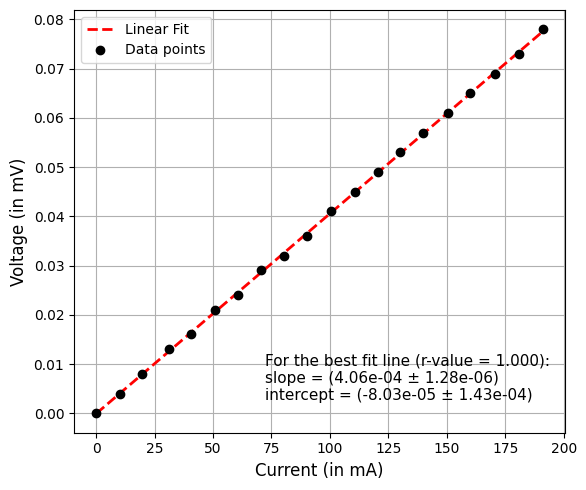

In [143]:
data = pd.read_excel('data.xlsx', sheet_name='al')
i = data['i (mA)'] # mA
v = data['v (mV)'] # mV

xx, yy, fit, error, label = fit_line(i, v)

plt.figure(figsize=(6,5))
plt.plot(xx, yy, 'r--', linewidth=2, label='Linear Fit')
plt.plot(i, v, 'ko', label='Data points')
# plt.errorbar(i, v, xerr=0.1, yerr=0.001, fmt='k.', label='Data points')
plt.legend()
plt.xlabel('Current (in mA)', fontsize=12)
plt.ylabel('Voltage (in mV)', fontsize=12)

plt.text(0.45,0.19,label, fontsize=11,transform=plt.gcf().transFigure)
plt.grid()
plt.tight_layout()
# plt.savefig('images/al.eps')

$$\rho_0 = \frac{V}{I}\times 2\pi \times \text{ probe distance} = 2\pi R S\\
\text{and, }\rho_\text{Al} = \frac{\rho_0}{2S/W \log(2)}$$
$$
\implies \rho_\text{Al} = \frac{\pi W R}{\log(2)}
$$

In [144]:
thickness = 0.017 # cm
rho = np.pi*thickness*fit[0]/np.log(2)
err_rho = rho*np.sqrt((0.001/thickness)**2 + (error[0]/fit[0])**2)
print(f'Resistance: {fit[0]:.3e} \pm {error[0]:.3e} Ohm')
print(f'Resistivity: {rho:.3e} \pm {err_rho:.3e} Ohm/cm')

Resistance: 4.063e-04 \pm 1.285e-06 Ohm
Resistivity: 3.131e-05 \pm 1.844e-06 Ohm/cm


## n-Si

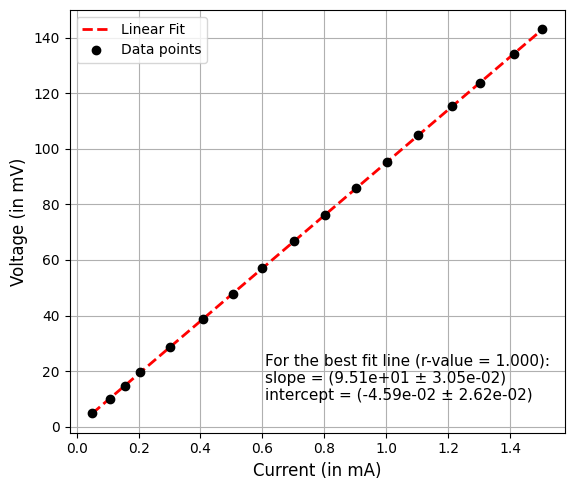

In [107]:
data = pd.read_excel('data.xlsx', sheet_name='si')
i = data['i (mA)'] # mA
v = data['v (mV)'] # mV

xx, yy, fit, error, label = fit_line(i, v)

plt.figure(figsize=(6,5))
plt.plot(xx, yy, 'r--', linewidth=2, label='Linear Fit')
plt.plot(i, v, 'ko', label='Data points')
plt.legend()
plt.xlabel('Current (in mA)', fontsize=12)
plt.ylabel('Voltage (in mV)', fontsize=12)

plt.text(0.45,0.19,label, fontsize=11,transform=plt.gcf().transFigure)
plt.grid()
plt.tight_layout()
# plt.savefig('images/si.eps')

In [50]:
thickness = 0.05 # cm
rho = np.pi*thickness*fit[0]/np.log(2)
err_rho = rho*np.sqrt((0.02)**2 + (error[0]/fit[0])**2)
print(f'Resistance: {fit[0]:.3f} \pm {error[0]:.3f} Ohm')
print(f'Resistivity: {rho:.3f} \pm {err_rho:.3f} Ohm/cm')

Resistance: 95.088 \pm 0.030 Ohm
Resistivity: 21.549 \pm 0.431 Ohm/cm


## n-Ge

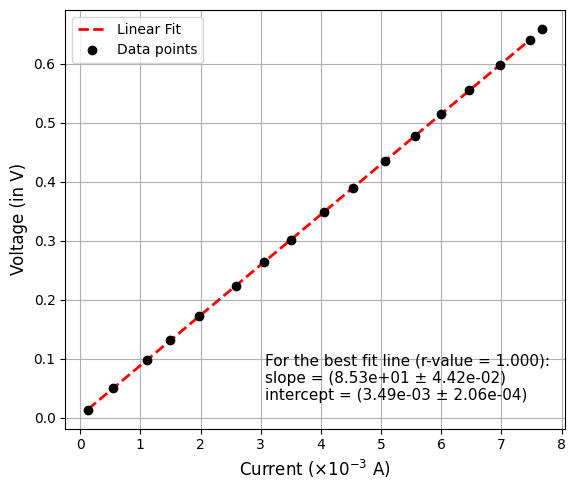

In [105]:
data = pd.read_excel('data.xlsx', sheet_name='ge')
i = data['i (mA)']*1e-3 # A
v = data['v (V)'] # V

xx, yy, fit, error, label = fit_line(i, v)

plt.figure(figsize=(6,5))
plt.plot(xx*1e3, yy, 'r--', linewidth=2, label='Linear Fit')
plt.plot(i*1e3, v, 'ko', label='Data points')
plt.legend()
plt.xlabel(r'Current ($\times 10^{-3}$ A)', fontsize=12)
plt.ylabel('Voltage (in V)', fontsize=12)

plt.text(0.45,0.19,label, fontsize=11,transform=plt.gcf().transFigure)
plt.grid()
plt.tight_layout()
# plt.savefig('images/ge.eps')

In [52]:
thickness = 0.05 # cm
rho = np.pi*thickness*fit[0]/np.log(2)
err_rho = rho*np.sqrt((0.02)**2 + (error[0]/fit[0])**2)
print(f'Resistance: {fit[0]:.3f} \pm {error[0]:.3f} Ohm')
print(f'Resistivity: {rho:.3f} \pm {err_rho:.3f} Ohm/cm')

Resistance: 85.264 \pm 0.044 Ohm
Resistivity: 19.322 \pm 0.387 Ohm/cm


# temperature variation

## aluminium

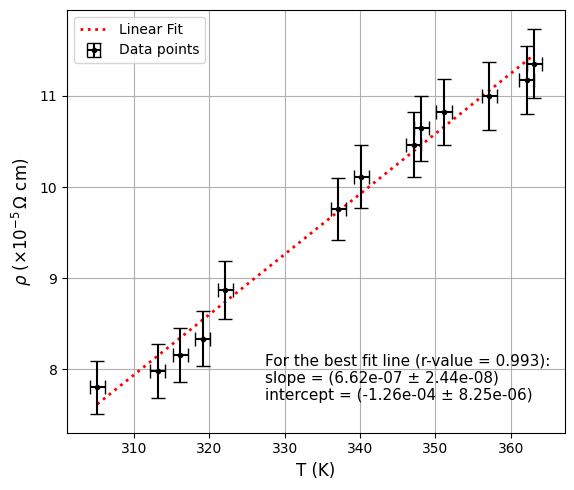

In [21]:
data = pd.read_excel('data.xlsx', sheet_name='temp al riyal')
rho = data['rho (x10^5)']*1e-5 # V
v = data['v (mV)']
T = data['T (in C)']+273.15 # K
errr = rho*np.sqrt((0.01/100)**2 + (.5/17)**2 + (0.001/v)**2)

plt.figure(figsize=(6,5))

xx, yy, fit, error, label = fit_line(T, rho)
plt.plot(xx, yy*1e5, ':r', linewidth=2, label='Linear Fit')

# plt.plot(np.log(v), 1/T, 'ko', label='Data points')
plt.errorbar(T, rho*1e5, yerr=errr*1e5, xerr=1, fmt='k.', label='Data points', capsize=5)
# plt.plot(T, rho, ':r')
plt.legend()
plt.ylabel(r'$\rho$ ($\times 10^{-5}\,\Omega$ cm)', fontsize=12)
plt.xlabel('T (K)', fontsize=12)

plt.text(0.45,0.19,label, fontsize=11,transform=plt.gcf().transFigure)
plt.grid()
plt.tight_layout()
# plt.savefig('images/temp-al.eps')

$$\rho = \rho_{T_0}[1+\alpha (T-T_0)]$$
$$\rho = \rho_{T_0}+\rho_{T_0} \alpha T - \rho_{T_0} \alpha T_0$$
$$\rho = \rho_{T_0} \alpha T + \rho_{T_0}(1-\alpha T_0) $$

In [22]:
rho_T0 = rho[0]
alpha = fit[0]/rho_T0
err_alpha = alpha*np.sqrt((error[0]/fit[0])**2+(errr[0]/rho_T0)**2)
print(f'alpha = ({alpha:.3e} \pm {err_alpha:.3e}) K-1')

alpha = (8.475e-03 \pm 4.442e-04) K-1


In [24]:
errr[0]

2.901558484156514e-06

## germanium

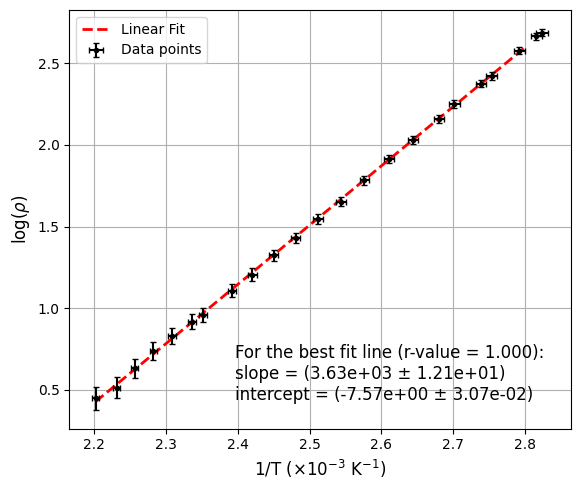

In [111]:
data = pd.read_excel('data.xlsx', sheet_name='temp ge')
v = data['v (V)'] # V
rho = data['rho'] # ohm cm
T = data['T (in C)']+273.15 # K
err_rho = rho*np.sqrt((0.02)**2 + (0.0025)**2 + (0.001/v)**2)
x, y = 1/T, np.log(rho)

plt.figure(figsize=(6,5))

xx, yy, fit, error, label = fit_line(x, y)
plt.plot(xx*1e3, yy, 'r--', linewidth=2, label='Linear Fit')
plt.errorbar(x*1e3, y, xerr=1e3*x**2, yerr=err_rho/rho, fmt='k.', capsize=2, label='Data points')
# plt.plot(x*1e3, y, 'ko', label='Data points')
plt.legend()
plt.ylabel(r'$\log(\rho)$', fontsize=12)
plt.xlabel(r'1/T ($\times 10^{-3}$ K$^{-1}$)', fontsize=12)

plt.text(0.4,0.19,label, fontsize=12,transform=plt.gcf().transFigure)
plt.grid()
plt.tight_layout()
# plt.savefig('images/temp-ge.eps')

In [91]:
Eg = 2*8.617e-5*fit[0]
err_Eg = Eg*error[0]/fit[0]
print(f'Eg = {Eg:.3f} \pm {err_Eg:.3f} eV')

Eg = 0.626 \pm 0.002 eV


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


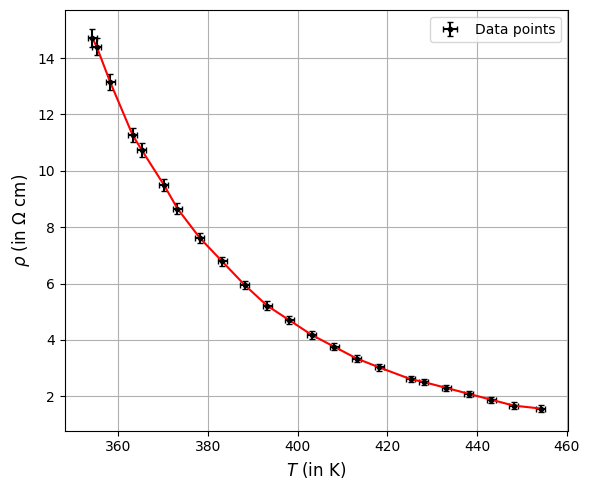

In [100]:
plt.figure(figsize=(6,5))

plt.errorbar(T, rho, xerr=1, yerr=err_rho, fmt='k.', capsize=2, label='Data points')
plt.plot(T, rho, '-r',)
plt.legend()
plt.ylabel(r'$\rho$ (in $\Omega$ cm)', fontsize=12)
plt.xlabel(r'$T$ (in K)', fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('images/rho-ge.eps')